# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.DataFrame(np.load('../data/X_train.npy'))
y_train = pd.DataFrame(np.load('../data/y_train.npy'))

X_test = pd.DataFrame(np.load('../data/X_test.npy'))
y_test = pd.DataFrame(np.load('../data/X_test.npy'))

# Band Overview

Index | Band | Description
--- | --- | ---
0 | B2 | Blue
1 | B3 | Green
2 | B4 | Red
3 | B5 | Visible and Near Infrared (VNIR)
4 | B6 | VNIR
5 | B7 | VNIR
6 | B8 | VNIR
7 | B8A | VNIR
8 | B11 | Short Wave Infrared (SWIR)
9 | B12 | SWIR

**Source**: *https://gisgeography.com/sentinel-2-bands-combinations/*

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,471,769,652,1134,2602,3137,3482,3443,2228,1246
1,576,797,721,1171,2255,2587,2687,2805,2133,1462
2,364,540,395,846,2699,3478,3206,3643,1785,910
3,611,1036,1158,1606,3057,3299,3561,3450,2721,2108
4,911,1279,1845,2197,2630,2905,3148,3145,3053,2372


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34976 entries, 0 to 34975
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       34976 non-null  int16
 1   1       34976 non-null  int16
 2   2       34976 non-null  int16
 3   3       34976 non-null  int16
 4   4       34976 non-null  int16
 5   5       34976 non-null  int16
 6   6       34976 non-null  int16
 7   7       34976 non-null  int16
 8   8       34976 non-null  int16
 9   9       34976 non-null  int16
dtypes: int16(10)
memory usage: 683.3 KB


In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9
count,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000
mean,503.503803,744.138323,717.715834,1199.739879,2497.450823,2970.183068,3109.943104,3241.972067,2068.825423,1255.909281
std,276.864323,341.004101,500.247402,493.551010,592.992346,729.055519,792.734640,776.268780,654.497119,577.000833
min,100.000000,155.000000,104.000000,93.000000,87.000000,87.000000,84.000000,82.000000,42.000000,39.000000
25%,290.000000,461.000000,303.000000,773.000000,2106.000000,2485.000000,2569.000000,2724.750000,1622.000000,781.000000
50%,434.000000,698.000000,556.000000,1160.000000,2553.000000,2997.000000,3152.000000,3289.000000,2077.000000,1181.000000
75%,666.000000,947.000000,1033.000000,1508.000000,2863.000000,3431.000000,3628.000000,3747.000000,2526.000000,1665.000000
max,5500.000000,5952.000000,6286.000000,6848.000000,6835.000000,6872.000000,6831.000000,6966.000000,6098.000000,6037.000000


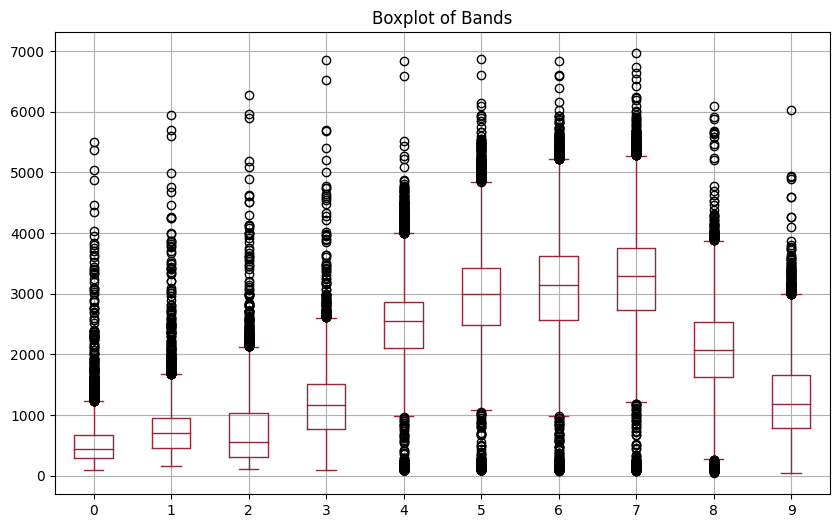

In [6]:
X_train.boxplot(color='#942738', figsize=(10, 6))
plt.title('Boxplot of Bands')
plt.savefig('Bands_Boxplot.png', bbox_inches='tight')
plt.show()

In [7]:
def plot_columns(df: pd.DataFrame, col_indices: list[int]):
    """Plot histograms of columns given by col_indices"""
    plt.figure(figsize=(10, 5))
    num_cols = len(col_indices)
    colors = plt.cm.viridis(np.linspace(0, 1, num_cols))
    for i, col_index in enumerate(col_indices):
        plt.hist(df.iloc[:, col_index], bins=50, density=True, alpha=0.3, color=colors[i], label=f'Column {col_index}')
    plt.title(f"Histograms for Bands {col_indices}")
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.xlim(0, 6000)
    plt.show()

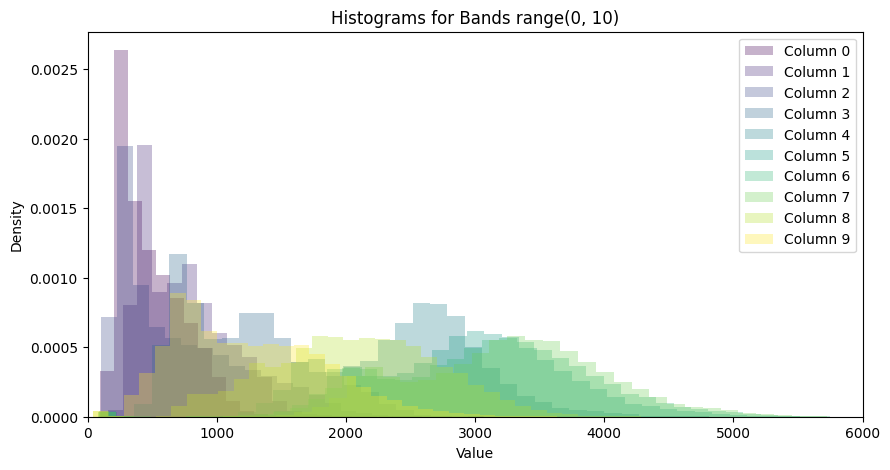

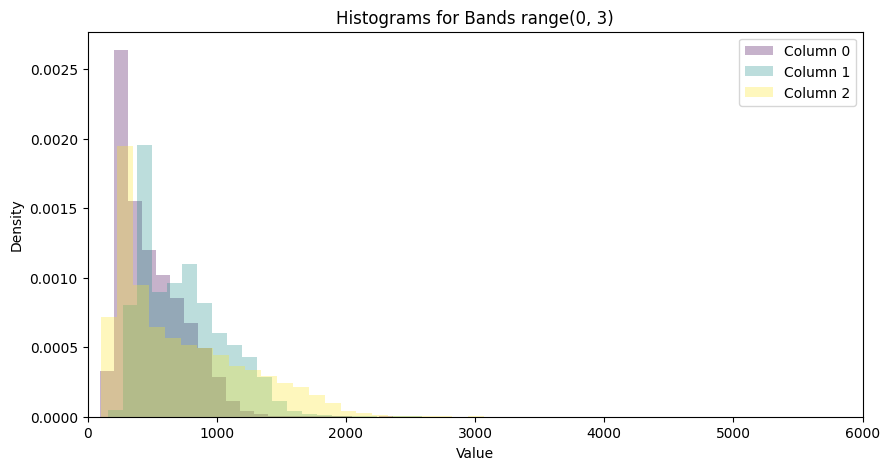

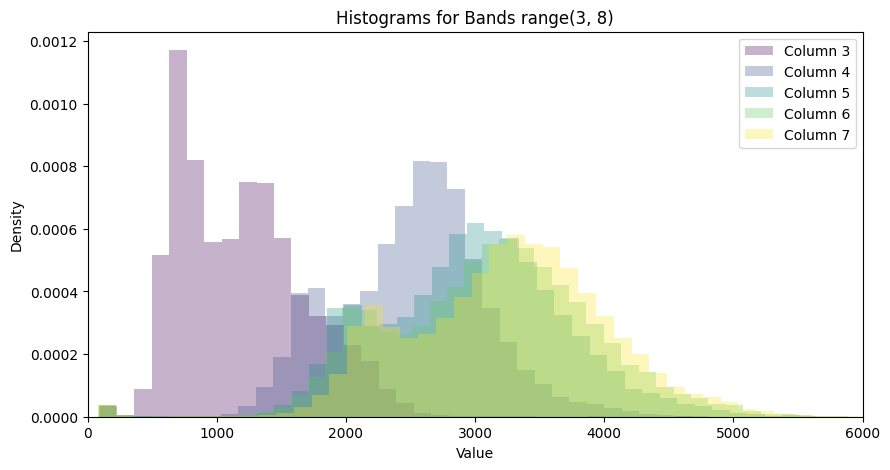

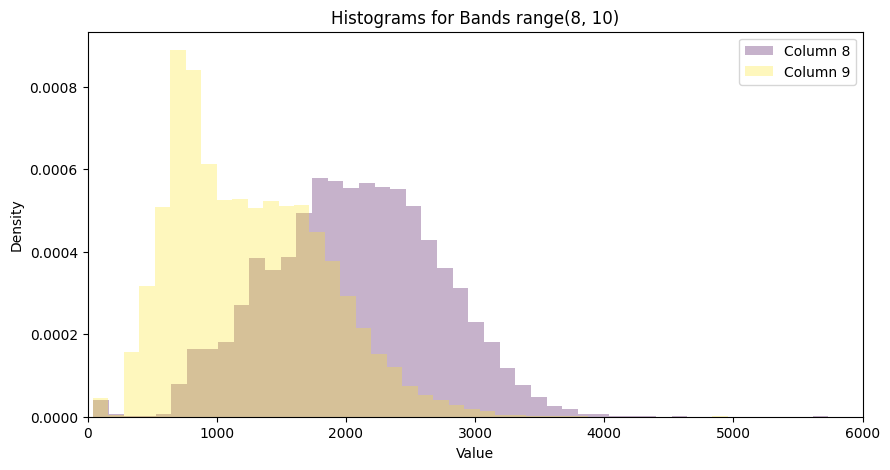

In [8]:
plot_columns(X_train, range(10))
plot_columns(X_train, range(0, 3))
plot_columns(X_train, range(3, 8))
plot_columns(X_train, range(8, 10))

# Labels Overview

In [9]:
y_train.head()

,0
0,8.37
1,5.43
2,2.76
3,3.17
4,2.87


In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34976 entries, 0 to 34975
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       34976 non-null  float64
dtypes: float64(1)
memory usage: 273.4 KB


In [11]:
y_train.describe()

,0
count,34976.000000
mean,11.870654
std,10.945183
min,1.340000
25%,2.860000
50%,5.600000
75%,20.820000
max,69.970001


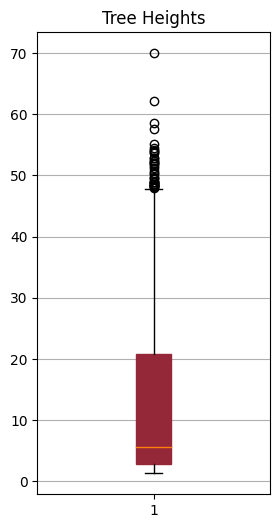

In [12]:
fig, ax = plt.subplots(figsize=(3, 6))
bp = ax.boxplot(y_train, patch_artist=True)
bp['boxes'][0].set(color='#942738')
ax.set_title('Tree Heights')
ax.yaxis.grid(True)
plt.show()

Plot distribution of tree heights of train labels vs. test labels.

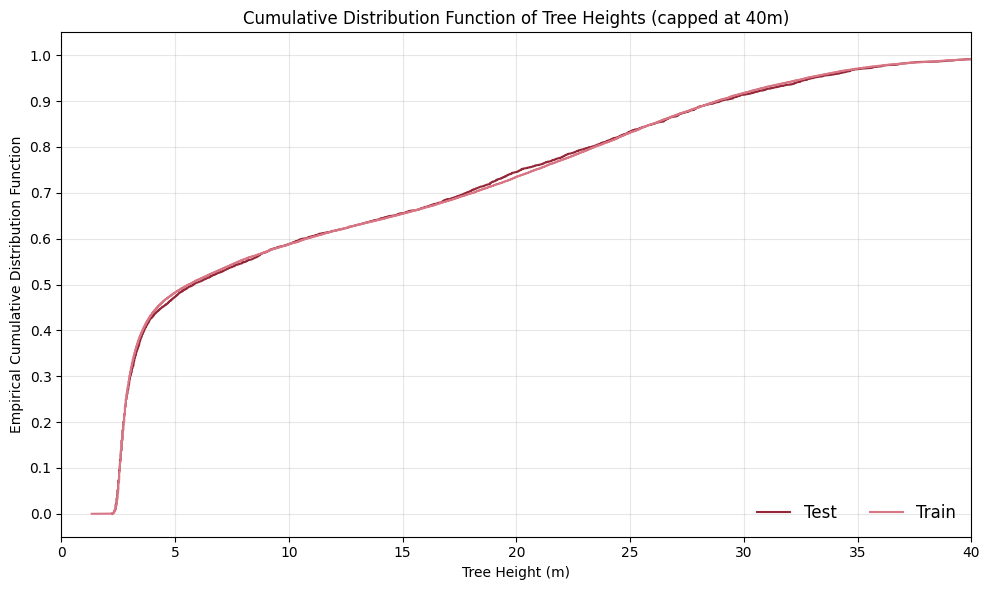

In [15]:
y_train = np.load('../data/y_train.npy')
y_train_sorted = np.sort(y_train)
y_cumulative = np.linspace(0., 1., len(y_train_sorted))
y_test = np.load('../data/y_test.npy')
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))

fig = plt.figure(figsize=(10, 6))

plt.plot(y_test_sorted, y_test_cumulative, label='Test', color='#942738')
plt.plot(y_train_sorted, y_cumulative, label='Train', color='#d97685')
plt.title('Cumulative Distribution Function of Tree Heights (capped at 40m)')
plt.xlabel('Tree Height (m)')
plt.ylabel('Empirical Cumulative Distribution Function')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 41, 5))
plt.xlim(0, 40)
plt.grid(alpha=0.3)
plt.legend(loc='lower right', ncol=2, fontsize=12, frameon=False)

plt.tight_layout()
plt.savefig('Tree_Heights_Distribution.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

Plot distribution of tree heights of train labels vs. test labels along with a histogram.

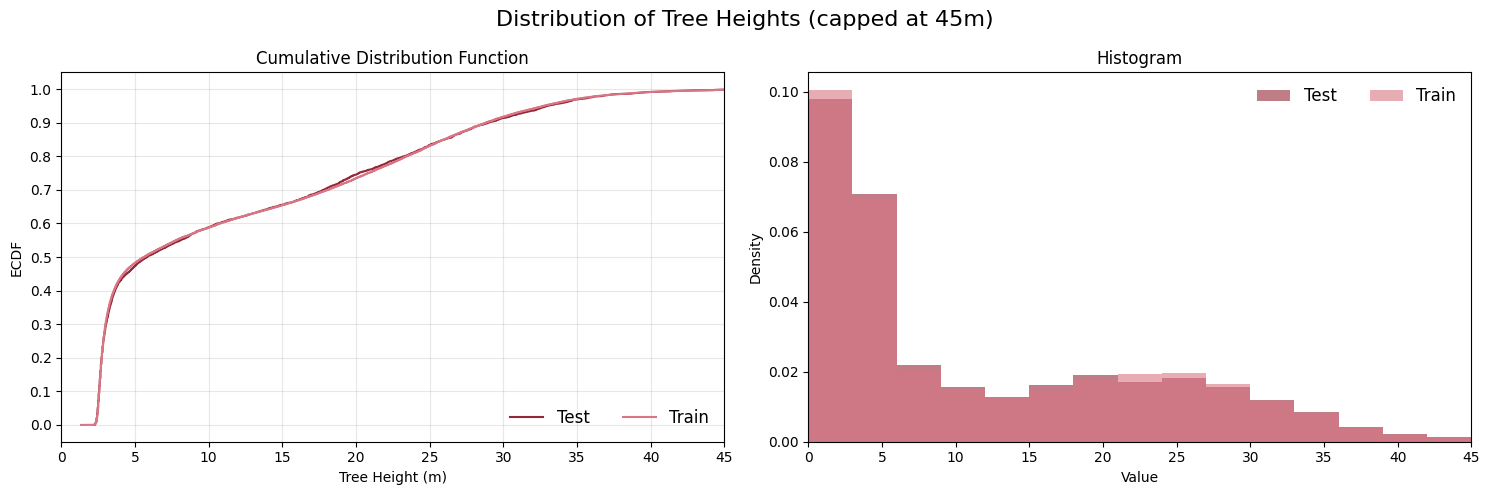

In [16]:
y_train = np.load('../data/y_train.npy')
y_train_sorted = np.sort(y_train)
y_cumulative = np.linspace(0., 1., len(y_train_sorted))
y_test = np.load('../data/y_test.npy')
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_test_cumulative, label='Test', color='#942738')
plt.plot(y_train_sorted, y_cumulative, label='Train', color='#d97685')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right', ncol=2, fontsize=12, frameon=False)

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='#942738', alpha=0.6, label='Test')
plt.hist(y_train, bins=range(0, 46, 3), density=True, color='#d97685', alpha=0.6, label='Train')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right', ncol=2, fontsize=12, frameon=False)

fig.suptitle('Distribution of Tree Heights (capped at 45m)', fontsize=16)

plt.tight_layout()
plt.show()